# GDAL - Geospatial Data Access Library

## Open dataset and fetch information

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import gdal


dataset = gdal.Open('/data/MER_FRS_1PNPDK20120303_093810_000000333112_00180_52349_3561.N1')
print 'Size is %d x %d x %d' % (dataset.RasterXSize,
                                dataset.RasterYSize,
                                dataset.RasterCount)
print dataset.GetMetadata()['MPH_SENSING_START']

Size is 4481 x 769 x 17
03-MAR-2012 09:38:10.449011


### Access band and fetch raw data

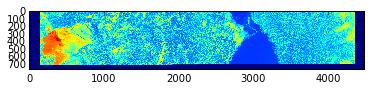

In [2]:
band = dataset.GetRasterBand(1)
array = band.ReadAsArray()
plt.imshow(array)

### Read subsection of the image

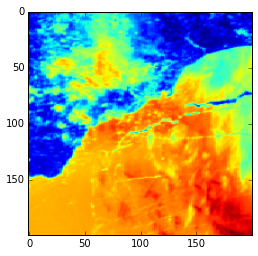

In [3]:
arr1 = band.ReadAsArray(xoff=200, yoff=200, win_xsize=200, win_ysize=200)
plt.imshow(arr1)

### Compute histogram

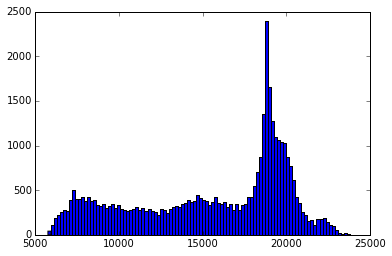

In [4]:
ans = plt.hist(arr1.flatten(), 100)

### Calculate band ratio

<matplotlib.colorbar.Colorbar instance at 0xa9494b2c>

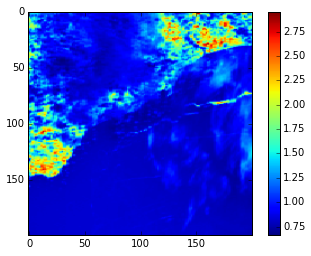

In [5]:
arr2 = dataset.GetRasterBand(8).ReadAsArray(200, 200, 200, 200).astype('float32')
plt.imshow(arr1/arr2);plt.colorbar()

### Create scatter-plot of two bands

<matplotlib.colorbar.Colorbar instance at 0xa930ab0c>

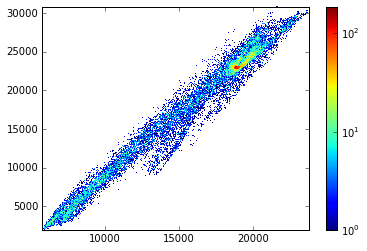

In [6]:
from matplotlib.colors import LogNorm
ans = plt.hist2d(arr1.flatten(), arr2.flatten(), 300, norm=LogNorm())
plt.colorbar()

## Command line tools

### Get information about the dataset 

In [7]:
!gdalinfo /data/MER_FRS_1PNPDK20120303_093810_000000333112_00180_52349_3561.N1

Driver: ESAT/Envisat Image Format
Files: /data/MER_FRS_1PNPDK20120303_093810_000000333112_00180_52349_3561.N1
Size is 4481, 769
Coordinate System is `'
GCP Projection = 
GEOGCS["WGS 84",
    DATUM["WGS_1984",
        SPHEROID["WGS 84",6378137,298.257223563,
            AUTHORITY["EPSG","7030"]],
        TOWGS84[0,0,0,0,0,0,0],
        AUTHORITY["EPSG","6326"]],
    PRIMEM["Greenwich",0,
        AUTHORITY["EPSG","8901"]],
    UNIT["degree",0.0174532925199433,
        AUTHORITY["EPSG","9108"]],
    AUTHORITY["EPSG","4326"]]
GCP[  0]: Id=1, Info=
          (0.5,0.5) -> (34.698006,61.259824,0)
GCP[  1]: Id=2, Info=
          (64.5,0.5) -> (34.427957,61.334252,0)
GCP[  2]: Id=3, Info=
          (128.5,0.5) -> (34.156082,61.408287,0)
GCP[  3]: Id=4, Info=
          (192.5,0.5) -> (33.883449,61.481635,0)
GCP[  4]: Id=5, Info=
          (256.5,0.5) -> (33.612048,61.553771,0)
GCP[  5]: Id=6, Info=
          (320.5,0.5) -> (33.337121,61.625957,0)
GCP[  6]: Id=7, Info=
          (384.5,0.5) -> (3

### Translate data from one format to another

In [8]:
!gdal_translate -b 1 /data/MER_FRS_1PNPDK20120303_093810_000000333112_00180_52349_3561.N1 temp1.tif
!ls -l

Input file size is 4481, 769
0...10...20...30...40...50...60...70...80...90...100 - done.
total 132436
-rwxrwx--- 1 root vboxsf    513976 Feb  4 10:40 advanced_plotting.ipynb
-rwxrwx--- 1 root vboxsf    269000 Feb  5 08:59 basemap.ipynb
-rwxrwx--- 1 root vboxsf    454239 Feb  5 09:27 gdal.ipynb
drwxrwx--- 1 root vboxsf      4096 Feb  5 06:19 intro
-rwxrwx--- 1 root vboxsf     35122 Feb  4 09:33 LICENSE
-rwxrwx--- 1 root vboxsf       532 Feb  4 09:33 program.rst
-rwxrwx--- 1 root vboxsf        61 Feb  4 09:33 README.rst
-rwxrwx--- 1 root vboxsf    610095 Feb  5 06:14 scipy.ipynb
-rwxrwx--- 1 root vboxsf   6947526 Feb  5  2015 temp1.tif
-rwxrwx--- 1 root vboxsf   7051881 Feb  5 07:08 temp2.tif
-rwxrwx--- 1 root vboxsf 119693497 Feb  5 06:58 temp.tif
-rwxrwx--- 1 root vboxsf      8313 Feb  4 09:37 test.ipynb


### Reproject data from one grid to another

In [9]:
!gdalwarp -t_srs '+proj=longlat' -te 12 61 34 65 -ts 0.1 0.1 -overwrite temp1.tif  temp2.tif

Creating output file that is 4400P x 800L.
Processing input file temp1.tif.
0...10...20...30...40...50...60...70...80...90...100 - done.


### View results of reprojection

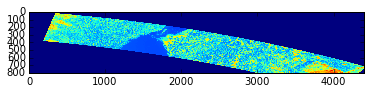

In [10]:
ds = gdal.Open('temp2.tif')
b = ds.GetRasterBand(1)
a = b.ReadAsArray()
plt.imshow(a)